## Exercício de Fixação de Conceitos (EFC) 2 – Série de Fourier
## Gustavo Nascimento Soares - 217530

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

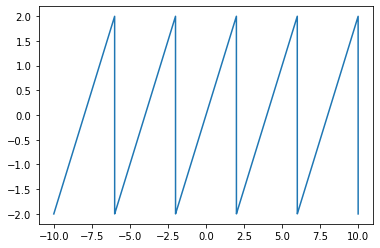

In [2]:
# Período do sinal contínuo
T = 4
# Intervalo da função: [-n_range, n_range]
n_range = 10
# Tamanho do sinal discretizado
size = int(1e4)
# Período do sinal discretizado
N = int(T*size/2/n_range)
# Tempo discretizado
t = np.linspace(-n_range, n_range, size)
# Sinal x(t)
x = (t + T/2) % T - T/2
# DataFrame para reunir resultados de cálculos
data = pd.DataFrame(index=range(4), columns=["N", "a", "x_N", "E_N"])
plt.plot(t, x)

### a)
----
O coeficiente $a_0$ corresponde ao valor médio do sinal dentro de um período. Como, dentro de um período, o sinal estudado é uma função ímpar, $$a_0 = 0$$.

In [3]:
# Rotina que computa os coeficientes da representação Série de Fourier de x[n] com período N de a_-K a a_K
def get_fourier_series_coeff(x: np.ndarray, K: int, N: int, a0: complex) -> np.ndarray:
    n = np.arange(0, N, 1)
    w0 = 2*np.pi/N
    # a é arredondado para levar a 0 valores muito próximos de zero mas computacionalmente diferentes
    a = np.round([
        np.sum(x[:N]*np.exp(-1j*k*w0*n))/N
        if k != 0 else a0      # a0 é calculado separadamente e passado como parâmetro
        for k in range(-K, K+1)
    ], 8)
    return a

### b)
----

In [4]:
# Rotina que computa a representação em Série de Fourier referente aos coeficientes em a com período N
def get_fourier_series(a: np.ndarray, N: int) -> np.ndarray:
    k = np.linspace(-(a.size//2), a.size//2, a.size)
    w0 = 2*np.pi/N
    x = np.real([
        np.sum(a*np.exp(1j*k*w0*n))
        for n in range(N)
    ])
    return x

### c) e d)
----

In [5]:
a0 = 0

data['N'] = [1, 10, 20, 50]
for i, K in enumerate(data['N']):
    data.at[i, 'a'] = get_fourier_series_coeff(x, K, N, a0)
for i, a in enumerate(data['a']):
    period = get_fourier_series(a, N)
    n_periods = int(2*n_range/T)
    data.at[i, 'x_N'] = np.concatenate(n_periods*[period], axis=0)
for i, x_N in enumerate(data['x_N']):
    data.at[i, 'E_N'] = np.mean((x - x_N)**2)
data

,N,a,x_N,E_N
0,1,"[(-0.0010001-0.63668292j), 0j, (-0.0010001+0.6...","[-0.0020002, -0.006000580317307276, -0.0100009...",0.522869
1,10,"[(-0.0010001-0.06366311j), (-0.0010001-0.07073...","[-0.020002000000000002, -0.05999840027221356, ...",0.0771637
2,20,"[(-0.0010001-0.0318237j), (-0.0010001-0.033499...","[-0.040004000000000005, -0.11995535531757234, ...",0.0395587
3,50,"[(-0.0010001-0.01270748j), (-0.0010001-0.01296...","[-0.10001000000000002, -0.2991836802182425, -0...",0.0161002


É possível notar que $E_N$ decai com o incremento de $N$. Isso é um comportamento esperado, já que o sinal trabalhado satisfaz as condições de Dirichlet e, portanto, possui uma representação em Série de Fourier. Por isso, é de se esperar que $E_N$ seja 0 quando $N$ tende ao infinito.

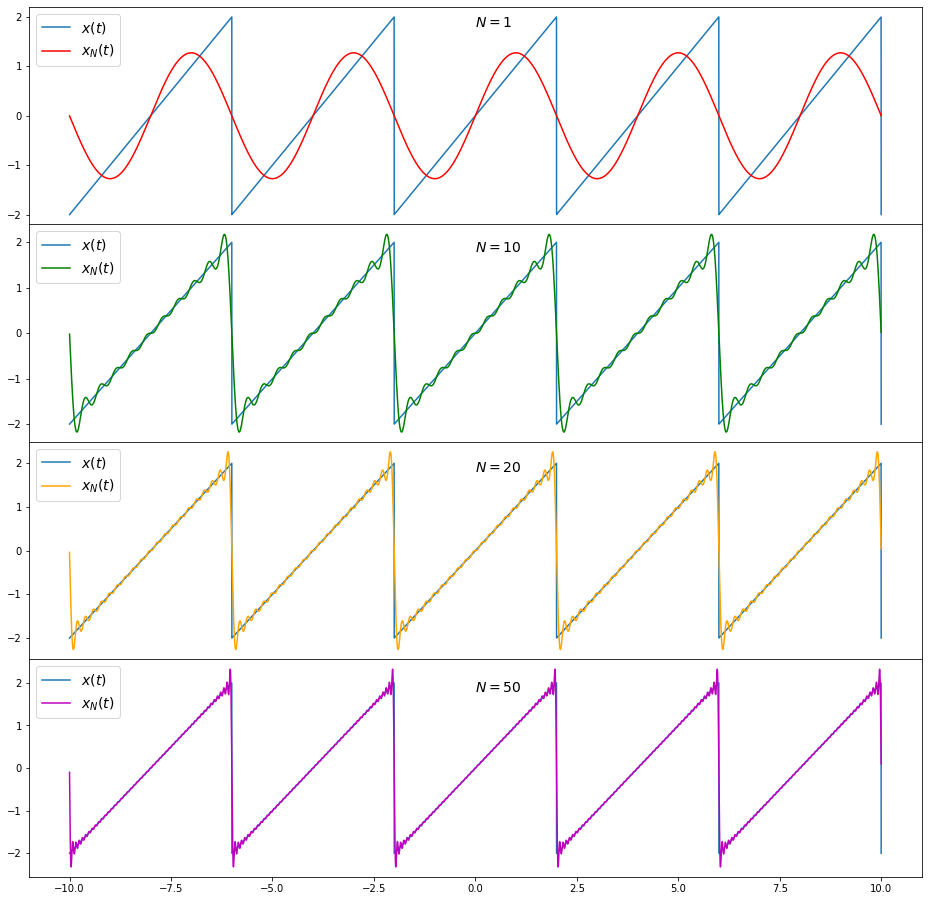

In [6]:
colors = ['r', 'g', 'orange', 'm']
fig, axs = plt.subplots(data.shape[0], 1, figsize=(16, 16), sharex=True, gridspec_kw={'hspace': 0})
plt.rcParams.update({'font.size': 14})
for i, (ax, c, Nk, x_N) in enumerate(zip(axs, colors, data['N'], data['x_N'])):
    ax.text(0, 1.8, r'$N = {}$'.format(Nk))
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.plot(t, x, label=r'$x(t)$')
    ax.plot(t, x_N, color=c, label=r'$x_N(t)$')
    ax.legend()

Pode ser observado que o incremento de $N$ resulta em cada vez melhores representações para o sinal $x(t)$. Isso concorda com o decréscimo de $E_N$ observado. É possível observar também a ocorrência do Fenômeno de Gibbs em todas as discontinuidades.

### e)
----

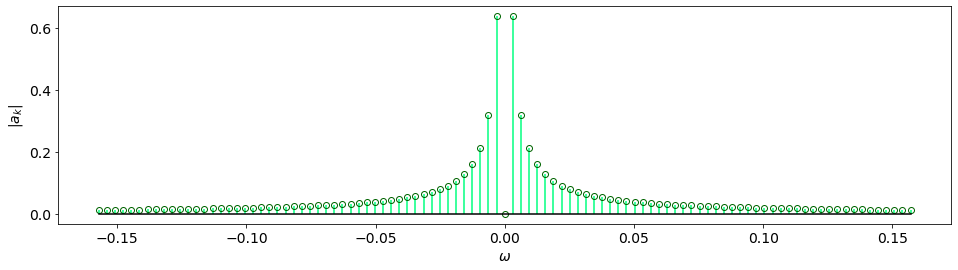

In [7]:
a = data.at[3, 'a']
w0 = 2*np.pi/N
k = np.linspace(-(a.size//2), a.size//2, a.size)
w = k*w0

# Plot
def set_markerlinecolors(markerline, facecolor, edgecolor):
    markerline.set_markerfacecolor(facecolor)
    markerline.set_markeredgecolor(edgecolor)
fig, ax = plt.subplots(figsize=(16, 4))
plt_args = {'basefmt': 'k', 'linefmt': 'springgreen', 'markerfmt': 'o', 'use_line_collection': True}
set_markerlinecolors(ax.stem(w, np.abs(a), **plt_args, label=r'$s[n]$')[0], 'none', 'darkgreen')
ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$|a_k|$')
plt.show()

A simetria presente nos valores de $|a_k|$ pode ser explicada pelo fato de $x(t)$ ser um sinal de valores reais. O que acarreta no resultado de $$a_k^* = a_{-k}$$

Logo, $$|a_k|=|a_{-k}|$$

### f)
----

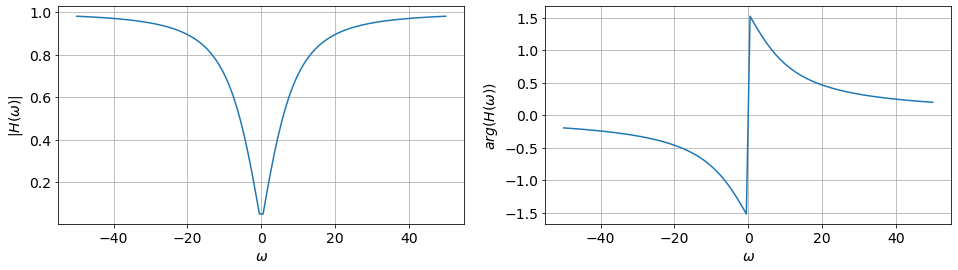

In [8]:
R = 1e5
C = 1e-6
wc = 1/R/C
wlim = 50
wp = np.linspace(-wlim, wlim, 100)
H = wp/(wp-1j*wc)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(wp, np.abs(H))
axs[0].set_xlabel(r'$\omega$')
axs[0].set_ylabel(r'$|H(\omega)|$')
axs[0].grid()
axs[1].plot(wp, np.angle(H))
axs[1].set_xlabel(r'$\omega$')
axs[1].set_ylabel(r'$arg(H(\omega))$')
axs[1].grid()

Analisando a resposta em frequência desse sistema, ele se comporta como um filtro passa-altas já que $|H(\omega)|$ se aproxima de 0 para cada vez menores valores de $|\omega|$ e se aproxima de 1 no sentido oposto. Observando a curva de $arg(H(\omega))$ pode-se chegar à mesma conclusão, já que a fase é cada vez menos distorcida à medida que $|\omega|$ cresce.

### g)
----

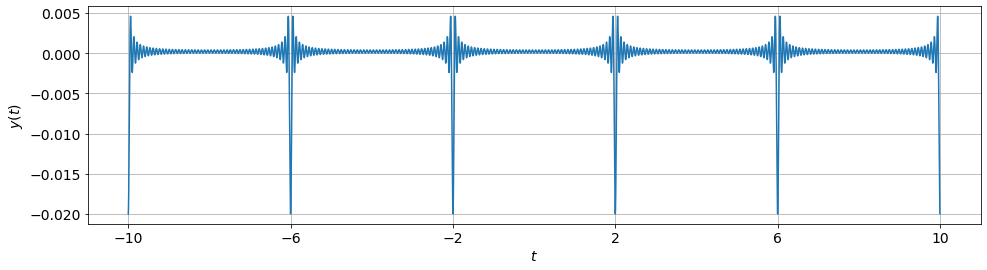

In [9]:
H = w/(w-1j*wc)
y = np.real([
    np.sum(a*H*np.exp(1j*w*n))
    for n in range(x.size)
])
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(t, y)
ax.set_xlabel('$t$')
ax.set_xticks(np.arange(-n_range, n_range+1, T))
ax.set_ylabel('$y(t)$')
ax.grid()


O sinal $x(t)$ é formado, em sua maior parte, por componentes de baixa frequência. Como observado pelos valores de $a_k$. Logo, ao passar por um sistema caracterizado como um filtro passa-altas, o resultado será uma forma distorcida de $x(t)$. O sinal obtido lembra uma função de valor constante. Isso concorda com o fato de que filtros passa-altas se comportam como circuitos diferenciadores do sinal de entrada. Como o sinal de entrada é uma reta em cada período, sua derivada é um valor constante.

### h)
----

A figura obtida no item g) foi obtida usando um número finito de coeficientes $a_k$, ou seja, uma aproximação do sinal de entrada. Para obter a resposta sem distorções por esse método, seria necessário todos os valores de $a_k$, o que corresponderia a $N \longrightarrow \infty$ e, portanto, $E_N = 0$.

Outra solução seria, a partir da resposta do sistema ao impulso $h(t)$, obter $y(t)$ a partir da convolução $y(t) = h(t)*x(t)$.